# DSCI 235 Final Project: Olympics Exploratory Analysis

GitHub: https://github.com/laurenbair/Olympics-Exploratory-Analysis/blob/main/OlympicsExploratoryAnalysis.ipynb

Using the "120 years of Olympic history: athletes and results" dataset, I will be analyzing major trends in the modern Olympic games by sport, global participation, and athlete performance. This dataset contains athlete result data from the modern Olympic games, beginning in Athens in 1896 and ending in Rio de Janiero in 2016. Women were first eligible to compete in the 1900 Olympic games, though the sports they competed in were limited. I'm particularly hoping to shed light on how women's participation and performance in the Olympic games has changed over time, both independent of and related to their male counterparts. 

While the Olympics provides an immense amount of entertainment to the global public, the impact of the games spans borders, economies, and political dynamics. Countries spend millions of dollars developing their athletes in the hopes of physical triumph at the largest, most public scale. For that reason, I am interested in tying in my academic economics studies into this analysis in hopes of identifying patterns within the games which reflect higher-level geopolitical trends. 

## Part 1: Reading in and Cleaning Data

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Reading in the Olympics Dataset

In [270]:
working_directory = os.getcwd()
path = working_directory + '/athlete_events.csv'

data = pd.read_csv(path)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Some of the columns in this dataset aren't relevant to my analysis - particularly, the ID column which mirrors the default numerical index of the python DataFrame, the Games column which is the data from the Year and Season columns, the NOC (National Olympic Committee) are redundant within my analysis. For this reason, I will drop these columns from my data. Additionally, I want to fill numerical columns which contain NaN values with 0. 

In [271]:
olympics = data.drop(['ID','NOC','Games'], axis = 1)
olympics
olympics[['Age','Height','Weight','Medal']] = olympics[['Age','Height','Weight','Medal']].fillna(0)
olympics.head()

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


For ease of determining the unweighted quantity of medals awarded, I have added a medal quantity column.

In [272]:
def medal_to_quantity(medal):
    if medal == 'Gold':
        return 1
    elif medal == 'Silver':
        return 1
    elif medal == 'Bronze':
        return 1
    else:
        return 0  

olympics['Medal_Quantity'] = olympics['Medal'].apply(medal_to_quantity)

I want to add a column which ties a numerical weight to the medal received so I can factor this into my analysis of performance.

In [273]:
def medal_to_numeric(medal):
    if medal == 'Gold':
        return 3
    elif medal == 'Silver':
        return 2
    elif medal == 'Bronze':
        return 1
    else:
        return 0  

olympics['Medal_Numeric'] = olympics['Medal'].apply(medal_to_numeric)

The data now contains the following columns:
* **Name**: Athlete's name
* **Sex**: Athlete's sex
* **Age**: Athlete's age
* **Height**: Athlete's height measured in centimeters
* **Weight**: Athlete's weight measured in kilograms
* **Team**: Team name
* **Year**: Year
* **Season**: Summer or Winter games
* **City**: Host City
* **Sport**: A sport is that which is governed by an International Federation (IF)
* **Event**: An event is a competition in a sport resulting in a ranking and giving rise to the awarding of medals
* **Medal**: Medal - Gold, Silver, Bronze, or 0 (indicating no medal was awarded)
* **Medal_Quantity**: (0 or 1) indicator of whether a medal was won in each observation
* **Medal_Numeric**: Numeric weights attached to gold, silver, bronze, and no medal (0). Gold = 3, Silver = 2, Bronze = 1, no medal(0) = 0

## Part 2: Performance by Nation Then vs. Now

In this section of my analysis, I will be attempting to show trends in participation and performance by nation since the birth of the modern olympic games. 

#### Performance by Nation: 1896
* What was the distribution of medals between participating nations during the first modern olympic games?
The first modern olympic games in the dataset is the 1896 Summer Olympics hosted in Athens, Greece.

In [367]:
olympics_1896 = olympics[olympics['Year'] == 1896]
medals_1896 = olympics_1896[olympics_1896['Medal'] != 0].groupby('Team').size()
medals_1896.sort_values(ascending = False)

Team
Greece                           44
Germany                          31
United States                    20
France                           11
Great Britain                     7
Denmark                           6
Hungary                           6
Austria                           5
Switzerland                       3
Australia                         2
Australia/Great Britain           2
Ethnikos Gymnastikos Syllogos     2
Great Britain/Germany             2
Greece-1                          2
dtype: int64

#### Visual of Medal Distribution by Nation in 1896

Text(0.5, 1.0, 'Medals Awarded in 1896 by Nation')

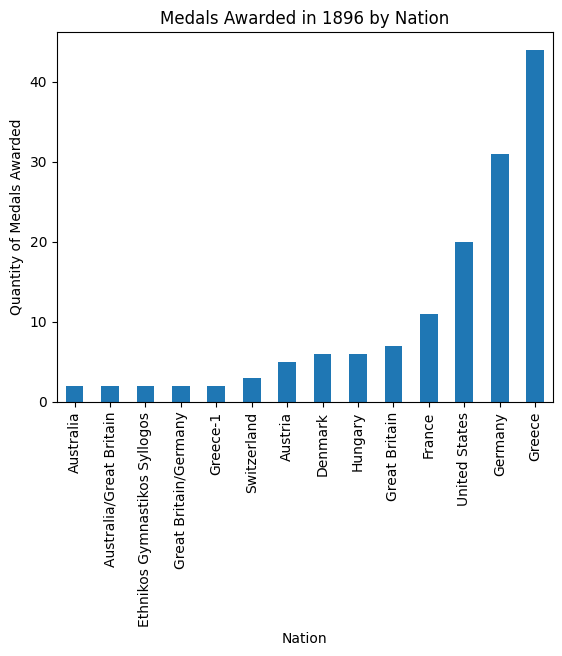

In [275]:
sorted_medals_1896 = medals_1896.sort_values()
sorted_1896_medals_plot = sorted_medals_1896.plot(kind = 'bar')
sorted_1896_medals_plot.set_xlabel('Nation')
sorted_1896_medals_plot.set_ylabel("Quantity of Medals Awarded")
sorted_1896_medals_plot.set_title("Medals Awarded in 1896 by Nation")

The highest-performing nation in the 1896 Olympic Games was Greece. Notably, these games were hosted in Athens, Greece and did not yet include female participants. It is worth noting that the only participants who traveled from outside of Europe were the United States and Australia (which was 6 British colonies until becoming a nation in 1901). My assumption is that the geographic distance and fewer transportation options made traveling such distances cost-prohibitive for nations not represented at the 1896 Games. Additionally, there were fewer independent nations established in 1896 than there are today, which likely plays a role in the sparse competing nations.

#### Performance by Nation: 2016
* What was the distribution of medals won between participating nations in the most recent modern olympic games?
The most recent modern olympic games in the dataset is the 2016 Summer Olympics hosted in Rio de Janeiro, Brazil. 

In [308]:
# Medals won in 2016 by participating nation
olympics_2016 = olympics[olympics['Year'] == 2016]
medals_2016 = olympics_2016[olympics_2016['Medal'] != 0].groupby('Team').size()
medals_2016.sum()
medals_2016.sort_values(ascending = False)

Team
United States    256
Germany          157
Great Britain    145
Russia           113
China            109
                ... 
Grenada            1
Tajikistan         1
Singapore          1
Puerto Rico        1
Portugal           1
Length: 98, dtype: int64

#### Visual of Medal Distribution by Nation in 2016

Text(0.5, 1.0, 'Medals Awarded in 2016 by Nation')

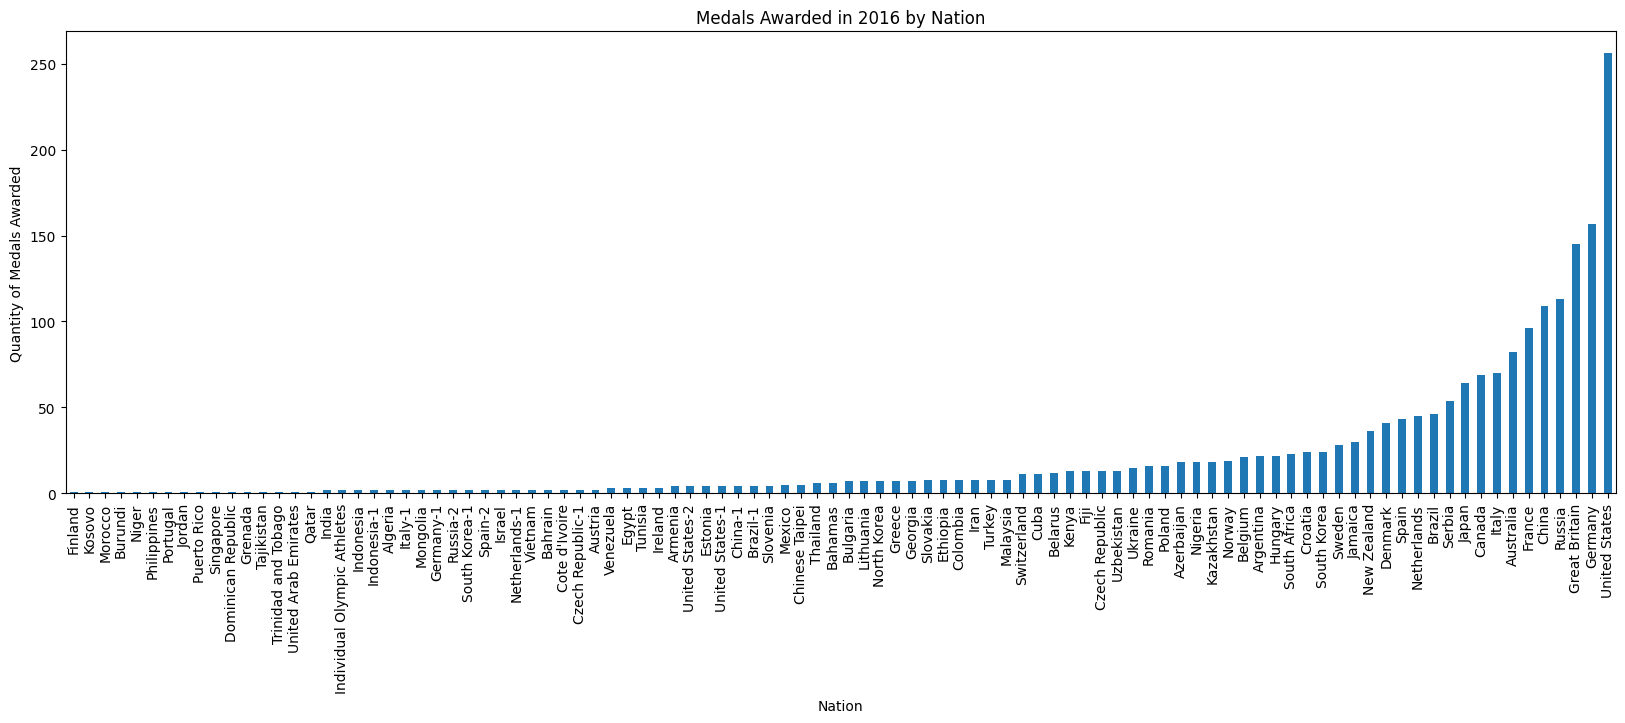

In [277]:
sorted_medals_2016 = medals_2016.sort_values()
sorted_2016_medals_plot = sorted_medals_2016.plot(kind = 'bar',figsize = (20,6))
sorted_2016_medals_plot.set_xlabel('Nation')
sorted_2016_medals_plot.set_ylabel("Quantity of Medals Awarded")
sorted_2016_medals_plot.set_title("Medals Awarded in 2016 by Nation")

#### How have the high-performing nations changed between the beginning of the modern olympics and present day?

In [278]:
top_ten_1896 = medals_1896.sort_values(ascending = False)[0:10]
top_ten_2016 = medals_2016.sort_values(ascending = False)[0:10]
list(top_ten_2016[top_ten_2016.index.isin(top_ten_1896.index)].index)

['United States', 'Germany', 'Great Britain', 'France', 'Australia']

The above 5 nations were among the highest 10 performing nations in both 1896 and 2016. As evidenced by the figures above, the amount of participating nations changed drastically between 1896 and 2016. This is likely spurred by widespread global development in the 20th and 21st centuries and the increasing importance of the Olympic Games. The 10 highest performing nations in the 2016 Games are also prominent on the geopolitical scale, either through economic development, military force, or political command.

## Part 3: Performance by Sport
In this section, I will identify the sports in which participating nations performed best in 1896 and 2016. I hope to gain insight into how sport-level performance has changed among dominant nations while gathering perspective into how more recently-added sports have impacted the Olympic landscape.

#### Performance by sport: 1896
* How many sports were there in the 1896 Olympic Games?

In [366]:
olympics_1896['Sport'].value_counts().count()

9

* What sport did each country perform best at in the 1896 games?

In [356]:
sports_1896 = olympics_1896.groupby(['Team', 'Sport'])['Medal_Numeric'].sum()
pivot_sports_1896 = sports_1896.reset_index().pivot_table(values='Medal_Numeric', index='Team', columns='Sport', aggfunc='max')
pivot_sports_1896.idxmax(axis=1)

Team
Australia                            Athletics
Australia/Great Britain                 Tennis
Austria                                Cycling
Denmark                          Weightlifting
Ethnikos Gymnastikos Syllogos       Gymnastics
France                                 Cycling
Germany                             Gymnastics
Great Britain                    Weightlifting
Great Britain/Germany                   Tennis
Greece                                Shooting
Greece-1                                Tennis
Greece-2                                Tennis
Greece-3                                Tennis
Hungary                               Swimming
Italy                                 Shooting
Sweden                               Athletics
Switzerland                         Gymnastics
United States                        Athletics
dtype: object

#### Performance by sport: 2016
* How many sports were there in the 2016 Olympic Games?

In [368]:
olympics_2016['Sport'].value_counts().count()

34

I want to identify which sports nations excelled in at the 2016 Olympic Games. Given the amount of competing nations, I selected the 20 highest-performing and the 20 lowest-performing nations from the 2016 Olympic Games.

* Which sports did the 20 highest-performing countries perform best at in the 2016 Games? 

In [358]:
sports_2016 = olympics_2016.groupby(['Team', 'Sport'])['Medal_Numeric'].sum()
sorted_medals_2016 = medals_2016.sort_values(ascending = False)[0:20]
top_20_countries_2016 = sports_2016.loc[sorted_medals_2016.index]
pivot_sports_2016 = top_20_countries_2016.reset_index().pivot_table(values='Medal_Numeric', index='Team', columns='Sport', aggfunc='max')
pivot_sports_2016.idxmax(axis=1).head(50)

Team
Australia            Swimming
Brazil               Football
Canada               Football
China                  Diving
Croatia            Water Polo
Denmark              Handball
France               Handball
Germany              Football
Great Britain          Rowing
Italy              Water Polo
Jamaica             Athletics
Japan              Gymnastics
Netherlands            Hockey
New Zealand      Rugby Sevens
Russia               Handball
Serbia             Water Polo
South Korea           Archery
Spain              Basketball
Sweden               Football
United States        Swimming
dtype: object

The majority (14/20) of these sports are team-oriented. 

* Which sports did the 20 lowest-performing countries perform best at in the 2016 Games? 

In [334]:
sorted_medals_2016 = medals_2016.sort_values(ascending = False)[-20:]
bottom_20_countries_2016 = sports_2016.loc[sorted_medals_2016.index]
pivot_sports_2016 = bottom_20_countries_2016.reset_index().pivot_table(values='Medal_Numeric', index='Team', columns='Sport', aggfunc='max')
pivot_sports_2016.idxmax(axis=1).head(50)

Team
Burundi                        Athletics
Dominican Republic             Taekwondo
Finland                           Boxing
Grenada                        Athletics
Israel                              Judo
Jordan                         Taekwondo
Kosovo                              Judo
Mongolia                            Judo
Morocco                           Boxing
Netherlands-1           Beach Volleyball
Niger                          Taekwondo
Philippines                Weightlifting
Portugal                            Judo
Puerto Rico                       Tennis
Qatar                          Athletics
Singapore                       Swimming
Tajikistan                     Athletics
Trinidad and Tobago            Athletics
United Arab Emirates                Judo
Vietnam                         Shooting
dtype: object

The majority (18/20) of these sports are individual. Note: there may be team events within some of these sports which I am not aware of.

We see a vast difference in the sports that countries participated in between 1896 and 2016. At the 2016 Games, there were 34 total sports whereas there were only 9 total sports at the 1896 Games. There may be a noteworthy trend between the prevalence of team sports among the higher-performing countries. Another finding of note is that many of the top 20 nations in 2016 performed best in sports that were not part of the games in 1896. 

## Part 4: Overall Performance by Sex 
In the next section of my analysis, I will seek to understand how men's and women's performance has changed over time by identifying medal distributions broken down by sex.

* How many medals have women won?

In [369]:
female_output = olympics[olympics['Sex'] == 'F']
total_female_medals = female_output['Medal'].value_counts()[1:4].sum()
total_female_medals

11253

* What percentage of the total medals awarded went to women?

In [370]:
total_medals = olympics['Medal'].value_counts()[1:4].sum()
percentage_women_medals = (total_female_medals / total_medals)*100
print(str(round(percentage_women_medals, 2)) + "%")

28.29%


* How many medals have men won?

In [371]:
male_output = olympics[olympics['Sex'] == 'M']
total_male_medals = male_output['Medal'].value_counts()[1:4].sum()
total_male_medals

28530

* What percentage of the total medals awarded went to men?

In [372]:
total_medals = olympics['Medal'].value_counts()[1:4].sum()
percentage_men_medals = (total_male_medals / total_medals)*100
print(str(round(percentage_men_medals, 2)) + "%")

71.71%


#### Visual of Medals Awarded by Sex

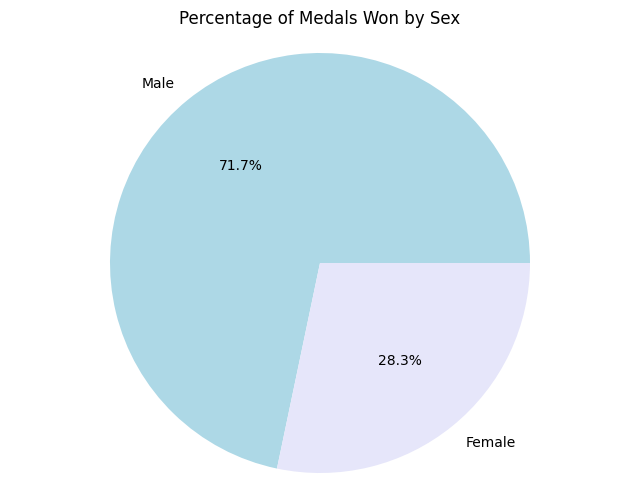

In [285]:
labels = ['Male', 'Female']
sizes = [percentage_men_medals, percentage_women_medals]
colors = ['lightblue', '#E6E6FA']
explode = (0, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=0)
plt.axis('equal') 
plt.title('Percentage of Medals Won by Sex')

plt.show()

Women have won 11253 models since gaining eligibility to compete in the olympics in 1900, which accounts for approximately 28% of all awarded medals. Men have won 28530 medals at the modern olympic games, accounting for approximately 72% of all awarded medals. The discrepancy in medals is linked to cultural and social stigma and fewer sports which included women. Though women were eligible to compete just 4 years after the "modern Olympic games" began in 1896, we still see a large gap between the medals won by men and women. This indicates there are additional factors at play which female hindered participation.

## Part 5: Participation Over Time by Sex
In the following portion of my analysis, I hope to illuminate trends in participation over time by sex. I am limiting my analysis to the Summer Olympics, as the modern Winter Olympics weren't introduced until 1924. Additionally, the Winter games occurred during the same calendar year as the Summer Games until 1992, when they began to be staggered every 2 years. To ensure I am using the same metric, I am looking exclusively at the Summer Games for this portion of my analysis.

* How has women's participation changed over time?

In [393]:
total_female_participants = women_over_time.sum()
total_female_participants.iloc[0]

59443

There have been approximately 59,443 female Olympic participants from 1900 to 2016. 

Text(0.5, 1.0, "Women's Participation in Summer Olympics Over Time")

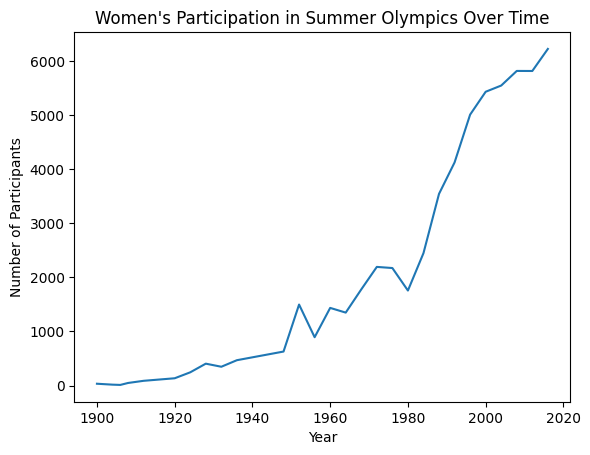

In [286]:
summer_female_output = female_output[female_output['Season'] == "Summer"]
women_over_time = summer_female_output.pivot_table(values='Name',index=['Year'],aggfunc='count')
women_over_time_plot = women_over_time.plot(legend = False)

women_over_time_plot.set_xlabel('Year')
women_over_time_plot.set_ylabel('Number of Participants')
women_over_time_plot.set_title("Women's Participation in Summer Olympics Over Time")

Women's participation in the Summer Games seems to dramatically increase beginning in the 1980s. The beginning of the 20th century depicts a slower growth in women's participation, possibly due to stigma and lack of resources for female athletes.

* How has men's participation changed over time?

In [387]:
total_male_participants = men_over_time.sum()
total_male_participants.iloc[0]

163109

There have been approximately 163,109 male Olympic participants between 1896 and 2016.

<Axes: title={'center': "Men's Participation in Summer Olympics Over Time"}, xlabel='Year', ylabel='Number of Participants'>

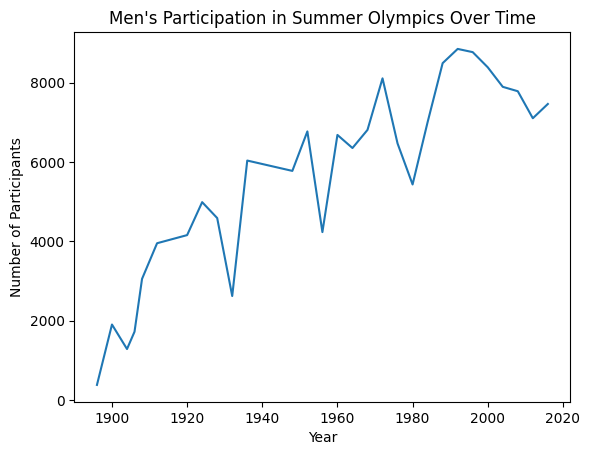

In [361]:
summer_male_output = male_output[male_output['Season'] == "Summer"]
men_over_time = summer_male_output.pivot_table(values='Name',index=['Year'],aggfunc='count')
men_over_time_plot = men_over_time.plot(legend = False)

men_over_time_plot.set_xlabel('Year')
men_over_time_plot.set_ylabel('Number of Participants')
men_over_time_plot.set_title("Men's Participation in Summer Olympics Over Time")
men_over_time_plot

We see higher overall participation in the men's participation growth as compared to the women's participation. However, there are interesting trends in men's participation that we don't see in their female counterparts'. My assumption is that participation loss is due to geopolitical circumstances. For instance, there is a sharp decline in the late 1930s which is likely linked to World War 2 as men were drafted to war. Additionally, the sharp decline in 1980 could be linked to the U.S. boycott of the Olympics, done in protest of the 1979 Soviet Invasion of Afghanistan.

## Part 6: Medal Distribution by Sport and Sex
Note: this is more reflective of the quantity of events within each "Sport" category, but it can help us to gain insight into the events and sports that nations have prioritized over time.

* Which sport have women won the most medals in? 

In [373]:
female_medal_distribution = female_output.pivot_table(values='Medal_Quantity',index=['Sport','Sex'],aggfunc='sum')
sorted_female_medals = female_medal_distribution.sort_values('Medal_Quantity', ascending = False)
sorted_female_medals['Medal_Quantity'].idxmax()[0]

'Swimming'

* How are the rest of women's medals distributed?

Text(0, 0.5, 'Quantity of Medals Won')

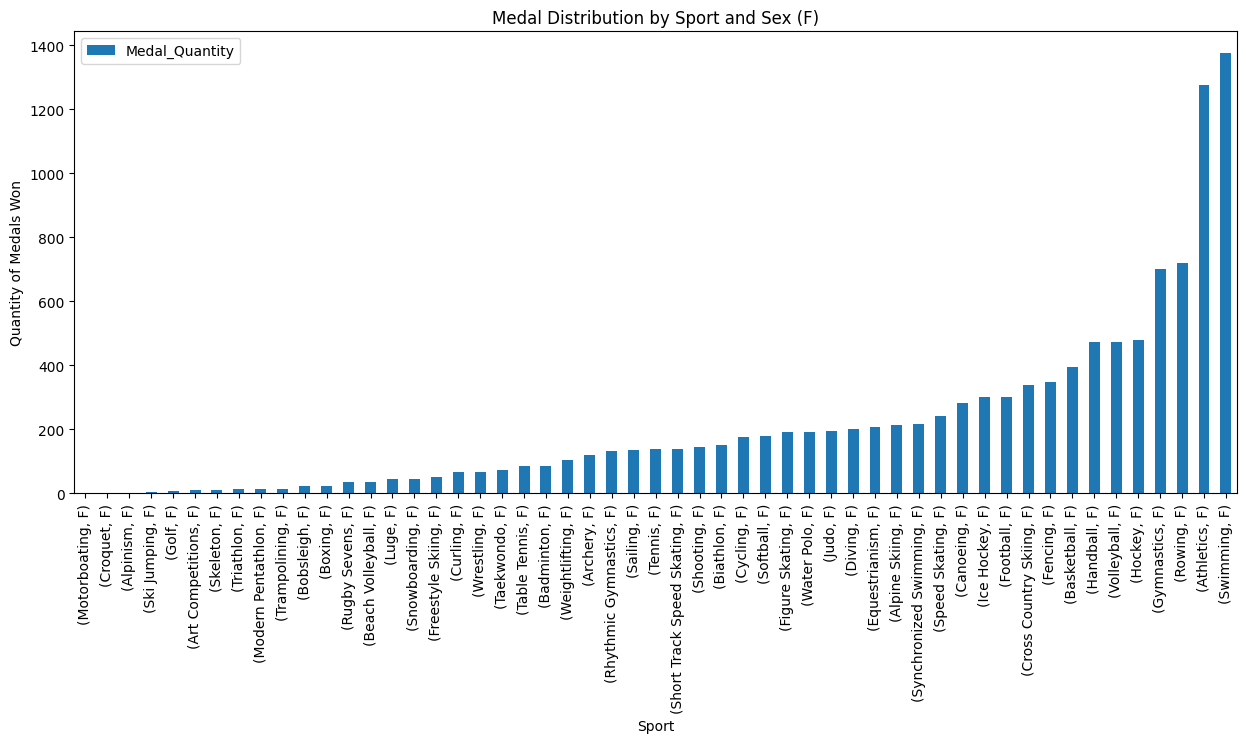

In [381]:
female_medal_distribution = female_output.pivot_table(values='Medal_Quantity',index=['Sport','Sex'],aggfunc='sum')
sorted_female_medals = female_medal_distribution.sort_values('Medal_Quantity', ascending = True)
sorted_female_medals_plot = sorted_female_medals.plot(kind = 'bar', figsize = (15,6))
sorted_female_medals_plot.set_title("Medal Distribution by Sport and Sex (F)")
sorted_female_medals_plot.set_xlabel("Sport")
sorted_female_medals_plot.set_ylabel("Quantity of Medals Won")

* Which sport have men won the most medals in?

In [376]:
male_medal_distribution = male_output.pivot_table(values='Medal_Numeric',index=['Sport','Sex'],aggfunc='sum')
sorted_male_medals = male_medal_distribution.sort_values('Medal_Numeric', ascending = False)
sorted_male_medals['Medal_Numeric'].idxmax()[0]

'Athletics'

* How are the rest of men's medals distributed?

Text(0, 0.5, 'Quantity of Medals Won')

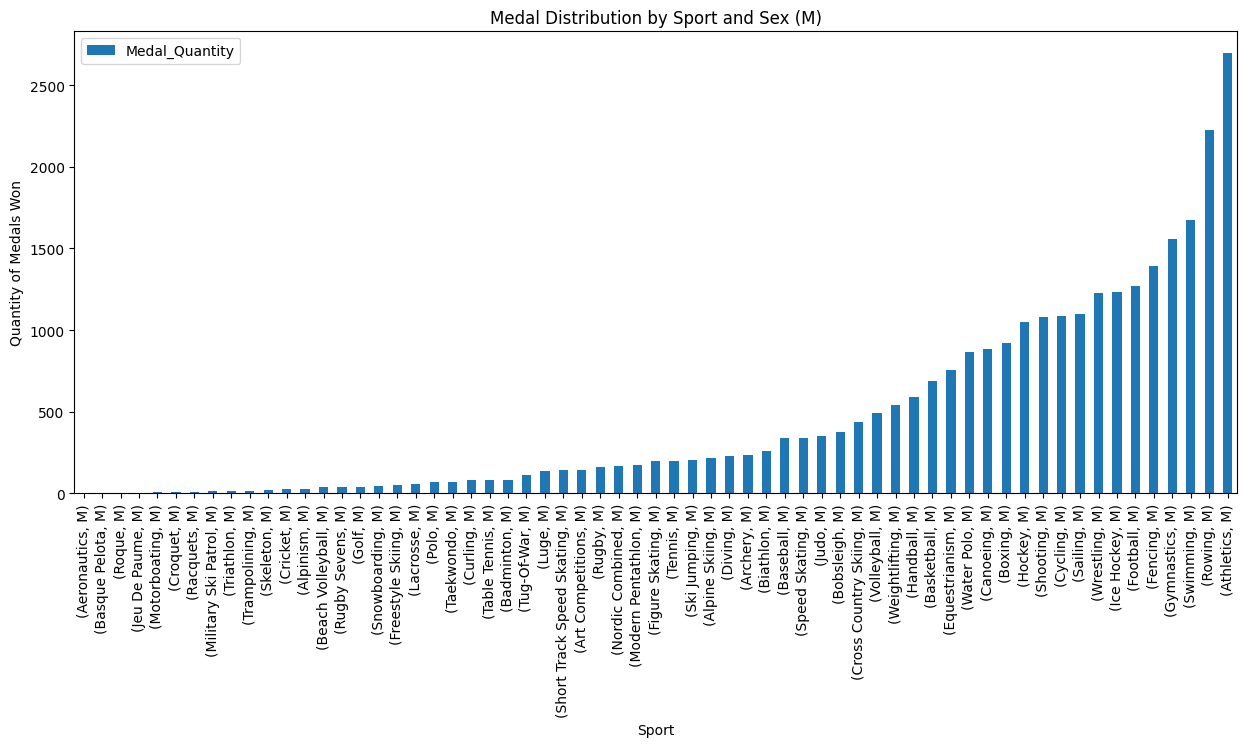

In [380]:
male_medal_distribution = male_output.pivot_table(values='Medal_Quantity',index=['Sport','Sex'],aggfunc='sum')
sorted_male_medals = male_medal_distribution.sort_values('Medal_Quantity', ascending = True)
sorted_male_medals_plot = sorted_male_medals.plot(kind = 'bar', figsize = (15,6))
sorted_male_medals_plot.set_title("Medal Distribution by Sport and Sex (M)")
sorted_male_medals_plot.set_xlabel("Sport")
sorted_male_medals_plot.set_ylabel("Quantity of Medals Won")

Women have won the most medals in swimming where men have won the most medals in athletics. However, it's interesting to note that the top 4 sports are the same between men and women (Athletics, Gymnastics, Swimming, and Rowing), though the distribution of medals between the sports changes by sex. The performance in these sports is likely due to a variety of factors: the amount of time they have been included in the Olympics, the quantity of events within each of these Sport categories, and popularity of these sports within high-performing countries.

### Part 7: Conclusion and Limitations

This analysis showed that while many aspects of the modern-day Olympic Games has changed between 1896 and present-day, certain components remain consistent. For instance, many of the high-performing nations from the dawn of the modern Games are still dominant. I purport that the Olympics are in some ways reflective of geopolitics: nation-level Olympic success is linked to nation-level resources and power, and that male participation trends in the games are influenced greatly by geopolitical events. Additionally, while women's participation rates have continued to increase, there is still a large discrepancy between medals awarded and total participation between men and women. There are many potential causal factors at play: societal stigma, less event eligibility, or fewer resources available to female athletes. Historical context synthesized with further analysis focused primarily on female olympic participation, performance, and nationality would be necessary to declare any causal relationships. 
Though this dataset was satisfactory for exploratory analysis and identifying high-level trends, which I focused the majority of my analysis on, outside historical context is necessary to declare causality regarding any observed relationships. Further, there were components of this dataset - like the large amount of NaNs and the nature of the dataset being open-source - which weaken any potential conclusions that could be drawn from this analysis. 